In [1]:
! pip install networkx matplotlib

import networkx as nx
from matplotlib import animation, pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
import time


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: C:\Users\anmol\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
#for simplicity we ll consider heuristic distances given and this function returns heuristic distance for all nodes
def heuristic(n):
    H_dist = {
        'S': 13,
        'A': 11,
        'B': 6,
        'C': 99,
        'D': 1,
        'E': 7,
        'G': 0,
    }
    return H_dist[n]

#Describe your graph here
Graph_nodes = {
    'S': [('A', 1), ('C', 5)],
    'A': [('S', 1), ('B', 2), ('E', 3)],
    'B': [('A', 2), ('C', 1), ('G', 9)],
    'C': [('S', 5), ('B', 1)],
    'D': [('E', 6), ('G', 1)],
    'E': [('A', 3), ('D', 6)],
    'G': [('B', 9), ('D', 1)]
}


In [3]:
def aStarAlgo_Anim(start_node, stop_node):
    open_set = set([start_node])
    closed_set = set()
    g = {}
    h = {}
    parents = {}
    
    g[start_node] = 0
    h[start_node] = heuristic(start_node)
    parents[start_node] = start_node
    
    animation_data = {
        'open_sets': [],
        'closed_sets': [],
        'current_nodes': [],
        'parents_maps': [],
        'path_costs': [],
        'heuristic_costs': []
    }
    
    while len(open_set) > 0:
        current_node = None
        for visited in open_set:
            if current_node == None or g[visited] + h[visited] < g[current_node] + h[current_node]:  # f-score comparison
                current_node = visited
        
        # Store current state for animation
        animation_data['open_sets'].append(open_set.copy())
        animation_data['closed_sets'].append(closed_set.copy())
        animation_data['current_nodes'].append(current_node)
        animation_data['parents_maps'].append(parents.copy())
        animation_data['path_costs'].append(g.copy())
        animation_data['heuristic_costs'].append(h.copy())
        
        if current_node == stop_node:
            path = []
            temp_node = current_node
            while parents[temp_node] != temp_node:
                path.append(temp_node)
                temp_node = parents[temp_node]
            path.append(start_node)
            path.reverse()
            print(f'Path found against the defined closed frontier list : {closed_set}, for child:parent defined {parents}.')
            return path, animation_data
        
        if current_node in Graph_nodes:
            for (next_node, weight) in Graph_nodes[current_node]:
                if next_node not in open_set and next_node not in closed_set:
                    open_set.add(next_node)
                    parents[next_node] = current_node
                    g[next_node] = g[current_node] + weight
                    h[next_node] = heuristic(next_node)
                else:
                    if g[next_node] > g[current_node] + weight:
                        g[next_node] = g[current_node] + weight
                        h[next_node] = heuristic(next_node)
                        parents[next_node] = current_node
                        if next_node in closed_set:
                            closed_set.remove(next_node)
                            open_set.add(next_node)
        
        if current_node == None:
            print('Path does not exist!')
            return None, animation_data
        
        open_set.remove(current_node)
        closed_set.add(current_node)
    
    print('Path does not exist!')
    return None, animation_data

aStarAlgo_Anim('S','G')

Path found against the defined closed frontier list : {'D', 'E', 'B', 'A', 'S'}, for child:parent defined {'S': 'S', 'A': 'S', 'C': 'B', 'B': 'A', 'E': 'A', 'G': 'D', 'D': 'E'}.


(['S', 'A', 'E', 'D', 'G'],
 {'open_sets': [{'S'},
   {'A', 'C'},
   {'B', 'C', 'E'},
   {'C', 'E', 'G'},
   {'C', 'D', 'G'},
   {'C', 'G'}],
  'closed_sets': [set(),
   {'S'},
   {'A', 'S'},
   {'A', 'B', 'S'},
   {'A', 'B', 'E', 'S'},
   {'A', 'B', 'D', 'E', 'S'}],
  'current_nodes': ['S', 'A', 'B', 'E', 'D', 'G'],
  'parents_maps': [{'S': 'S'},
   {'S': 'S', 'A': 'S', 'C': 'S'},
   {'S': 'S', 'A': 'S', 'C': 'S', 'B': 'A', 'E': 'A'},
   {'S': 'S', 'A': 'S', 'C': 'B', 'B': 'A', 'E': 'A', 'G': 'B'},
   {'S': 'S', 'A': 'S', 'C': 'B', 'B': 'A', 'E': 'A', 'G': 'B', 'D': 'E'},
   {'S': 'S', 'A': 'S', 'C': 'B', 'B': 'A', 'E': 'A', 'G': 'D', 'D': 'E'}],
  'path_costs': [{'S': 0},
   {'S': 0, 'A': 1, 'C': 5},
   {'S': 0, 'A': 1, 'C': 5, 'B': 3, 'E': 4},
   {'S': 0, 'A': 1, 'C': 4, 'B': 3, 'E': 4, 'G': 12},
   {'S': 0, 'A': 1, 'C': 4, 'B': 3, 'E': 4, 'G': 12, 'D': 10},
   {'S': 0, 'A': 1, 'C': 4, 'B': 3, 'E': 4, 'G': 11, 'D': 10}],
  'heuristic_costs': [{'S': 13},
   {'S': 13, 'A': 11, 'C': 99

In [4]:
def animate_search_process(animation_data, final_path=None):

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
    plt.subplots_adjust(wspace=0.3)
    
    # Create the complete graph for reference
    complete_G = nx.Graph()
    for node, neighbors in Graph_nodes.items():
        for neighbor, weight in neighbors:
            complete_G.add_edge(node, neighbor, weight=weight)
    
    # Precompute positions for consistent layout
    all_nodes = set()
    for parents_map in animation_data['parents_maps']:
        all_nodes.update(parents_map.keys())
    
    # Use spring layout with fixed seed for consistent positioning
    pos = nx.spring_layout(complete_G, seed=42)
    
    def update(frame):
        ax1.clear()
        ax2.clear()

        if frame >= len(animation_data['open_sets']):
            return
        
        # Current state
        open_set = animation_data['open_sets'][frame]
        closed_set = animation_data['closed_sets'][frame]
        current_node = animation_data['current_nodes'][frame]
        parents = animation_data['parents_maps'][frame]
        path_costs = animation_data['path_costs'][frame]
        heuristic_costs = animation_data['heuristic_costs'][frame]
        
        # Plot 1: Current search tree based on parents
        G = nx.DiGraph()
        all_nodes = set(parents.keys())
        for current_node in all_nodes:
            G.add_node(current_node)
        
        for child, parent in parents.items():
            if child != parent:
                weight = 0
                if parent in Graph_nodes:
                    for neighbor, w in Graph_nodes[parent]:
                        if neighbor == child:
                            weight = w
                            break
                G.add_edge(parent, child, weight=weight)
        
        # Node colors
        node_colors = []
        node_labels = {}
        for node in G.nodes():
            if node == current_node:
                node_colors.append('yellow')  
                node_labels[node] = f"{node}\nCURRENT"
            elif node in open_set:
                node_colors.append('lightgreen')  # Open set
                node_labels[node] = f"{node}\nOPEN"
            elif node in closed_set:
                node_colors.append('lightcoral')  # Closed set
                node_labels[node] = f"{node}\nCLOSED"
            else:
                node_colors.append('lightblue')  # Unexplored
                node_labels[node] = node
        
        # Draw graph with fixed positions
        nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=800, ax=ax1)
        nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True, arrowsize=20, ax=ax1)
        nx.draw_networkx_labels(G, pos, ax=ax1)

        # Use custom labels for better readability
        nx.draw_networkx_labels(G, pos, labels=node_labels, ax=ax1)
        
        # Edge labels (weights)
        edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, ax=ax1)
        
        ax1.set_title(f'Step {frame+1}: Search Tree\nCurrent: {current_node}')
        ax1.set_xlim(-1.5, 1.5)
        ax1.set_ylim(-1.5, 1.5)
        
        # Plot 2: Complete graph with status
        complete_colors = []
        for node in complete_G.nodes():
            if node == current_node:
                complete_colors.append('yellow')
            elif node in open_set:
                complete_colors.append('lightgreen')
            elif node in closed_set:
                complete_colors.append('lightcoral')
            else:
                complete_colors.append('lightblue')

        nx.draw_networkx_nodes(complete_G, pos, node_color=complete_colors, node_size=800, ax=ax2)
        nx.draw_networkx_edges(complete_G, pos, ax=ax2)
        nx.draw_networkx_labels(complete_G, pos, ax=ax2)

        # Add g-values and f-values as current_node labels
        node_labels = {}
        for node in complete_G.nodes():
            g_val = path_costs.get(node, 'Infinity')
            h_val = heuristic(node)
            f_val = g_val + h_val if isinstance(g_val, (int, float)) else 'Infinity'
            node_labels[node] = f'{node}\ng:{g_val}\nh:{h_val}\nf:{f_val}'
        
        label_pos = {k: (v[0], v[1] + 0.1) for k, v in pos.items()}
        nx.draw_networkx_labels(complete_G, label_pos, labels=node_labels, ax=ax2)
        
        # Highlight final path if we have it and we're at the last frame
        if final_path and frame == len(animation_data['open_sets']) - 1:
            path_edges = [(final_path[i], final_path[i+1]) for i in range(len(final_path)-1)]
            nx.draw_networkx_edges(complete_G, pos, edgelist=path_edges, edge_color='red', width=3, ax=ax2)
        
        # Edge labels with weights
        edge_labels = {}
        for u, v in complete_G.edges():
            weight = next((magnitude for node, magnitude in Graph_nodes[u] if node == v), 0)
            edge_labels[(u, v)] = f'w:{weight}'
        
        nx.draw_networkx_edge_labels(complete_G, pos, edge_labels=edge_labels, ax=ax2)
        
        ax2.set_title('Complete Graph with Costs')
        ax2.set_xlim(-1.5, 1.5)
        ax2.set_ylim(-1.5, 1.5)
        
        # ax1.text(0.02, 0.98, 'Legend:\n🟡 Current (Yellow)\n🟢 Open (Green)\n🔴 Closed (Red)\n🔵 Unexplored (Blue) ', transform=ax1.transAxes, verticalalignment='top', fontname="Segoe UI Emoji", bbox=dict(boxstyle='round', alpha=0.5, facecolor='white', edgecolor='black'))
        labels = [
            ("Current (Yellow)", "yellow"),
            ("Open (Green)", "lightgreen"),
            ("Closed (Red)", "lightcoral"),
            ("Unexplored (Blue)", "lightblue")
        ]
        
        y = 0.95
        for label, color in labels:
            ax1.text(
            0.05, y, label,
            transform=ax1.transAxes,
            va="center", ha="left", fontsize=12
            )
            ax1.plot(
            0.02, y, "o", color=color, markersize=12,
            transform=ax1.transAxes, clip_on=False
            )
            y -= 0.07
    
    # Create animation with proper reference
    anim = FuncAnimation(fig, update, frames=len(animation_data['open_sets']), interval=2000, repeat=True, blit=False)
    
    plt.tight_layout()
    
    # Save the animation to prevent garbage collection
    try:
        # Save as GIF
        anim.save('a_star_animation.gif', writer=PillowWriter(fps=1))
        print("Animation saved as 'a_star_animation.gif'")
    except Exception as e:
        print(f"Could not save GIF: {e}")
    
    # Display the animation
    plt.show()

    ###############################################################
    """Simple visualization that shows each step without complex animation"""

    num_steps = min(len(animation_data['open_sets']), 20)
    fig, axes = plt.subplots(2, (num_steps+1)//2, figsize=(18, 12))
    axes = axes.flatten()
    
    # Create the complete graph for reference
    complete_G = nx.Graph()
    for node, neighbors in Graph_nodes.items():
        for neighbor, weight in neighbors:
            complete_G.add_edge(node, neighbor, weight=weight)
    
    pos = nx.spring_layout(complete_G, seed=42)
    
    for step in range(num_steps):
        ax = axes[step]
        
        open_set = animation_data['open_sets'][step]
        closed_set = animation_data['closed_sets'][step]
        current_node = animation_data['current_nodes'][step]
        parents = animation_data['parents_maps'][step]
        
        # Create current search tree
        G = nx.DiGraph()
        all_nodes = set(parents.keys())
        for current_node in all_nodes:
            G.add_node(current_node)
        
        for child, parent in parents.items():
            if child != parent:
                weight = 0
                if parent in Graph_nodes:
                    for neighbor, w in Graph_nodes[parent]:
                        if neighbor == child:
                            weight = w
                            break
                G.add_edge(parent, child, weight=weight)
        
        # Node colors
        node_colors = []
        for node in G.nodes():
            if node == current_node:
                node_colors.append('yellow')
            elif node in open_set:
                node_colors.append('lightgreen')
            elif node in closed_set:
                node_colors.append('lightcoral')
            else:
                node_colors.append('lightblue')
        
        # Draw graph
        nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=600, ax=ax)
        nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True, arrowsize=15, ax=ax)
        nx.draw_networkx_labels(G, pos, ax=ax)
        
        # Edge labels
        edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, ax=ax)
        
        ax.set_title(f'Step {step+1}\nCurrent: {current_node}')
        ax.set_xlim(-1.5, 1.5)
        ax.set_ylim(-1.5, 1.5)
    
    # Hide unused subplots
    for i in range(num_steps, len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()
    
    return anim

Running A* Algorithm...
Path found against the defined closed frontier list : {'D', 'E', 'B', 'A', 'S'}, for child:parent defined {'S': 'S', 'A': 'S', 'C': 'B', 'B': 'A', 'E': 'A', 'G': 'D', 'D': 'E'}.

Final Path: ['S', 'A', 'E', 'D', 'G']
Total Cost: 11

Creating animated and step-by-step visualization...
Animation saved as 'a_star_animation.gif'


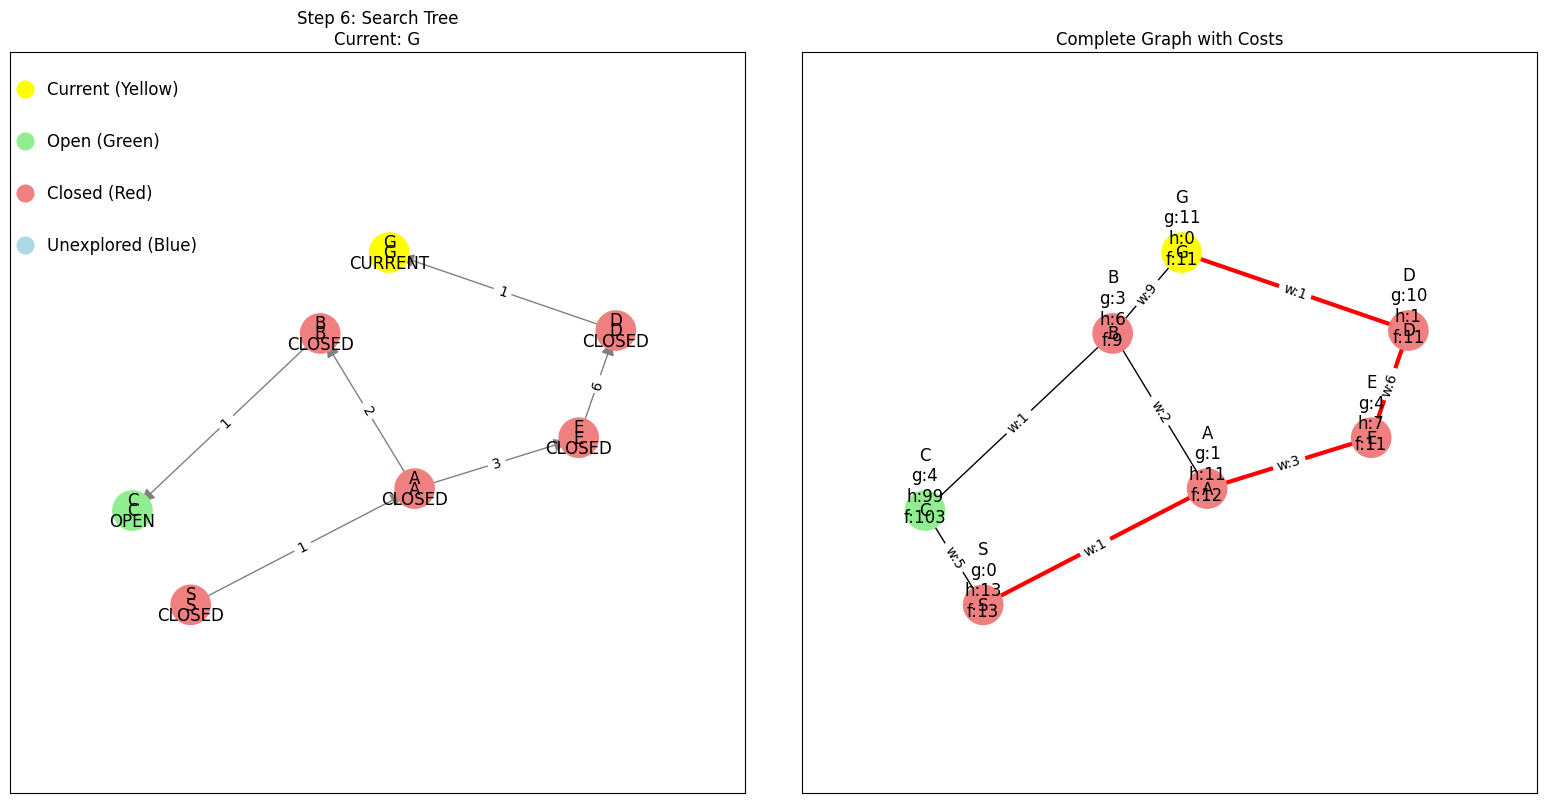

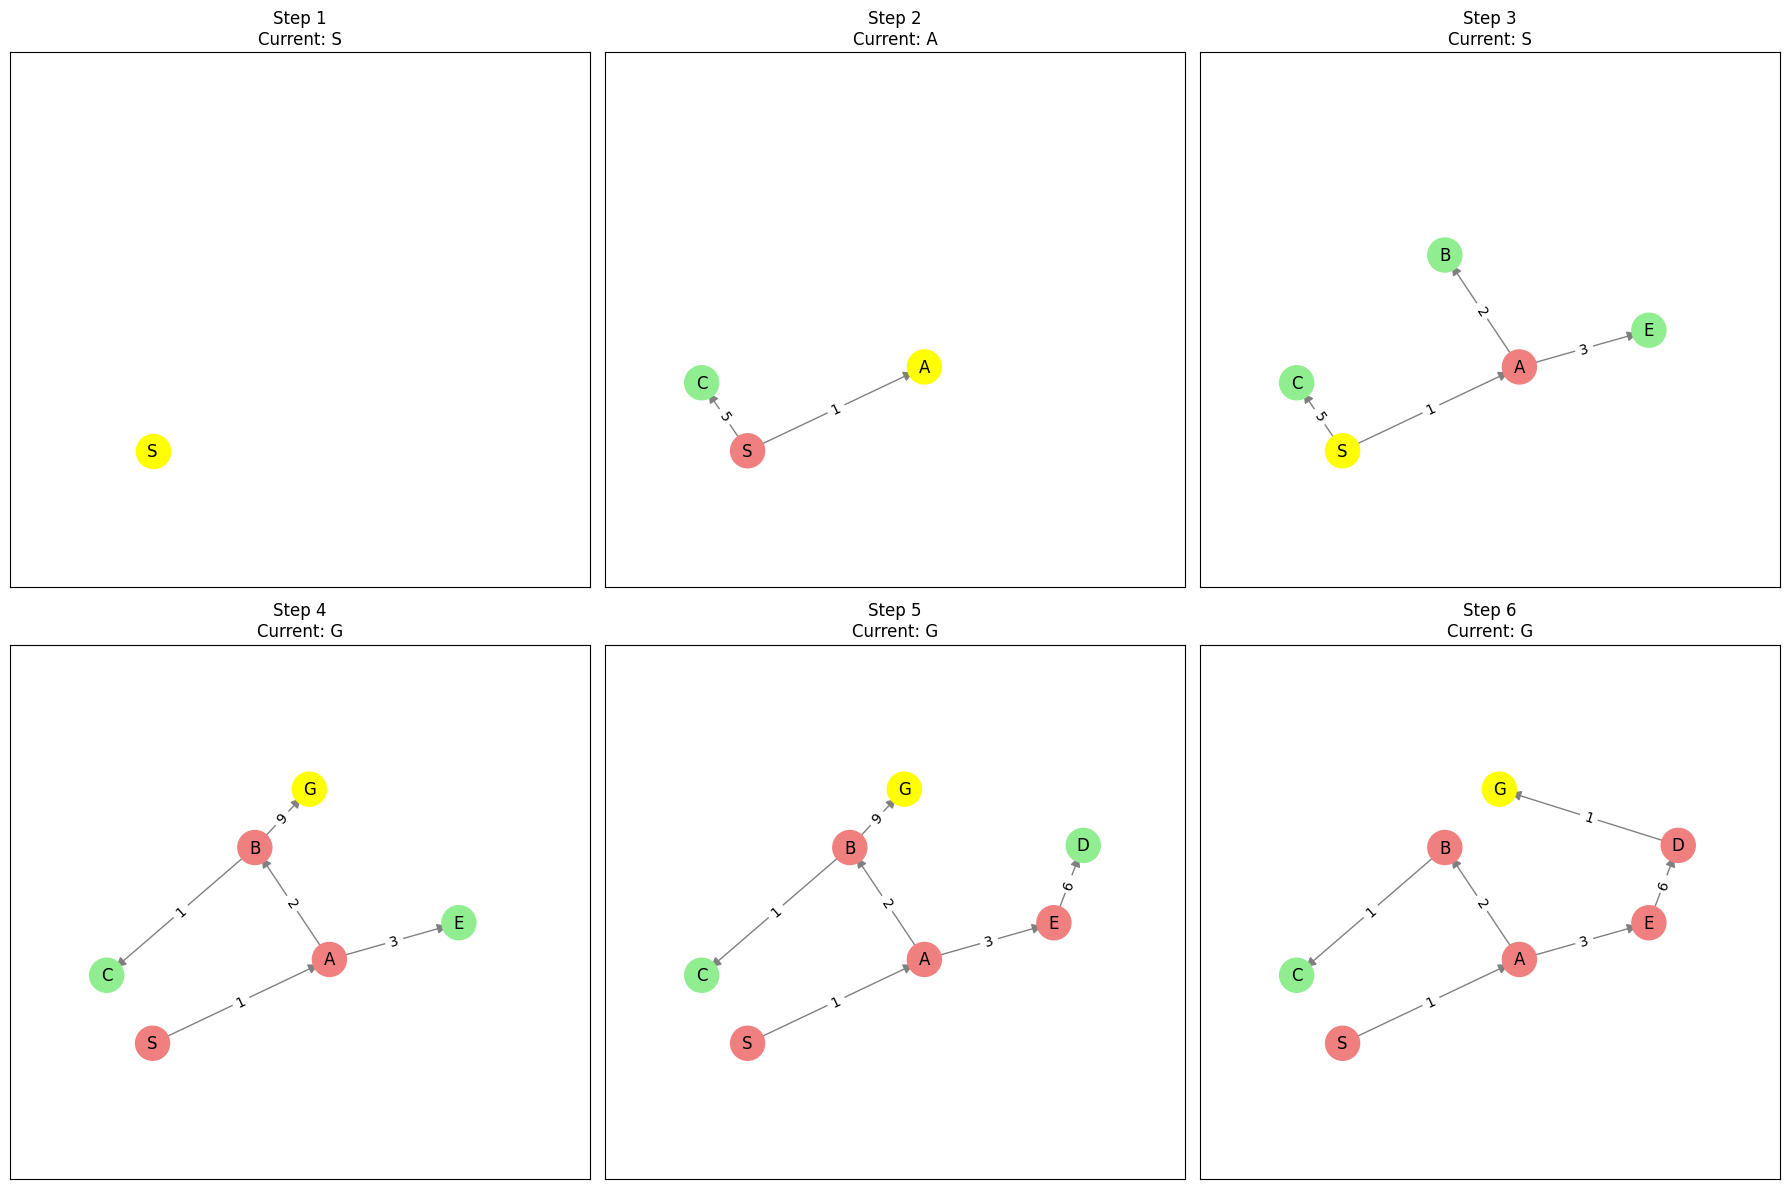

In [5]:
# Run the A* algorithm
print("Running A* Algorithm...")
final_path, animation_data = aStarAlgo_Anim('S', 'G')

if final_path:
    print(f"\nFinal Path: {final_path}")
    print(f"Total Cost: {animation_data['path_costs'][-1].get('G', 'N/A')}")
    
    # Method 1: Try the animated version
    print("\nCreating animated and step-by-step visualization...")
    anim = animate_search_process(animation_data, final_path)
else:
    print("No path found!")

<br/>

![A_Star_Algo_Animated](a_star_animation.gif)

In [6]:
# Text-based tree visualization
def display_text_tree_animation(animation_data):
    """Text-based animation showing tree growth"""
    print("\n" + "="*100)
    print("TEXT-BASED TREE VISUALIZATION")
    print("="*100)
    
    for step in range(len(animation_data['open_sets'])):
        print(f"\n\n--- Step {step+1} ---")
        print(f"Current Node: {animation_data['current_nodes'][step]}")
        print(f"Open Set: {animation_data['open_sets'][step]}")
        print(f"Closed Set: {animation_data['closed_sets'][step]}")
        
        parents = animation_data['parents_maps'][step]
        path_costs = animation_data['path_costs'][step]
        
        print("Tree Structure:")
        
        # Build tree structure
        tree = {}
        for child, parent in parents.items():
            if parent not in tree:
                tree[parent] = []
            if child != parent:  # Avoid self-reference for root
                tree[parent].append(child)

        # Find root (current_node that is its own parent)
        root = next(node for node, parent in parents.items() if node == parent)

        def print_a_star_node(node, level=0, is_last=True):
            indent = "    " * level
            prefix = "L___________ " if level > 0 else ""
            
            # Node info
            status = ""
            if node == animation_data['current_nodes'][step]:
                status = "  <---<  (CURRENT)"
            elif node in animation_data['open_sets'][step]:
                status = " [OPEN]"
            elif node in animation_data['closed_sets'][step]:
                status = " [CLOSED]"
            
            g_val = path_costs.get(node, 'Infinity')
            h_val = heuristic(node)
            f_val = g_val + h_val if isinstance(g_val, (int, float)) else '∞'
            
            print(f"{indent}{prefix}{node} (g={g_val}, h={h_val}, f=g+h={f_val}){status}")
            
            # Print children
            if node in tree:
                children = tree[node]
                for i, child in enumerate(children):
                    print_a_star_node(child, level + 1, i == len(children) - 1)

        print_a_star_node(root)
        time.sleep(2)  # Pause between steps

# Run text-based animation for Graph Nodes Traversal step-wise
display_text_tree_animation(animation_data)


TEXT-BASED TREE VISUALIZATION


--- Step 1 ---
Current Node: S
Open Set: {'S'}
Closed Set: set()
Tree Structure:
S (g=0, h=13, f=g+h=13)  <---<  (CURRENT)


--- Step 2 ---
Current Node: A
Open Set: {'C', 'A'}
Closed Set: {'S'}
Tree Structure:
S (g=0, h=13, f=g+h=13) [CLOSED]
    L___________ A (g=1, h=11, f=g+h=12)  <---<  (CURRENT)
    L___________ C (g=5, h=99, f=g+h=104) [OPEN]


--- Step 3 ---
Current Node: B
Open Set: {'C', 'B', 'E'}
Closed Set: {'S', 'A'}
Tree Structure:
S (g=0, h=13, f=g+h=13) [CLOSED]
    L___________ A (g=1, h=11, f=g+h=12) [CLOSED]
        L___________ B (g=3, h=6, f=g+h=9)  <---<  (CURRENT)
        L___________ E (g=4, h=7, f=g+h=11) [OPEN]
    L___________ C (g=5, h=99, f=g+h=104) [OPEN]


--- Step 4 ---
Current Node: E
Open Set: {'C', 'G', 'E'}
Closed Set: {'B', 'S', 'A'}
Tree Structure:
S (g=0, h=13, f=g+h=13) [CLOSED]
    L___________ A (g=1, h=11, f=g+h=12) [CLOSED]
        L___________ B (g=3, h=6, f=g+h=9) [CLOSED]
            L___________ C (g=4, h=